In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as rq
import numpy as np
import time
import pickle
from io import BytesIO
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Scrap des images pour un hashtag

In [20]:
USERNAME = 'sosorezka@gmail.com'
PASSWORD = 'sofia2001'

In [34]:
def scrap_by_hashtag(nb_max = 50, hashtag='chat'):

    options = webdriver.ChromeOptions()
    options.headless = True  # Exécution sans interface graphique

    # Initialiser le navigateur Chrome sans spécifier executable_path
    driver = webdriver.Chrome(options=options)

    # Accéder à la page de connexion de Pixelfed
    login_url = 'https://pixelfed.social/login'
    driver.get(login_url)

    # Remplir le formulaire de connexion
    username = USERNAME
    password =  PASSWORD

    username_field = driver.find_element(By.NAME, 'email')
    password_field = driver.find_element(By.NAME, 'password')

    username_field.send_keys(username)
    password_field.send_keys(password)

    # Soumettre le formulaire de connexion
    login_button = driver.find_element(By.CSS_SELECTOR, "button.btn.btn-primary.btn-block.btn-lg.font-weight-bold")
    ActionChains(driver).move_to_element(login_button).click().perform()

    driver.implicitly_wait(10)
    
    # Ouvrir une nouvelle fenêtre
    new_window = driver.execute_script("window.open('https://pixelfed.social/i/web/hashtag/{}', 'new_window');".format(hashtag))

    # Changer la fenêtre active
    driver.switch_to.window(driver.window_handles[-1])
    
    liste_url = []
    liste_img = []
    
    while len(liste_url)<nb_max :
        
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        time.sleep(1)
        print(len(liste_url))
        post =driver.find_element(By.CSS_SELECTOR, "div.row.mx-0.hashtag-feed")
        #print(post)
        # Trouver les images
        images = post.find_elements(By.CSS_SELECTOR, "img")
        for image in images :
            image_url = image.get_attribute('src')
            if image_url not in liste_url : 
                try : 
                    response = rq.get(image_url)
                    img = np.array(Image.open(BytesIO(response.content)))
                    liste_url.append(image_url)
                    liste_img.append(img)
                    print(len(liste_img))
                except:
                    print("erreur get")
            
    df = pd.DataFrame({'url':liste_url, 'image':liste_img})
    print(len(liste_url))
    
    # Fermer la fenêtre
    driver.close()

    # Récupérer la fenêtre principale
    driver.switch_to.window(driver.window_handles[0])

    # Fermer le navigateur
    driver.quit()

    with open(f'dataframe_{hashtag}.pkl', 'wb') as file : 
        pickle.dump(df, file)

    return df
 

In [35]:
test = scrap_by_hashtag()

0
1
erreur get
2
3
4
erreur get
5
6
7
8
erreur get
erreur get
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
erreur get
31
32
33
34
35
36
37
38
39
40
41
41
erreur get
erreur get
erreur get
erreur get
erreur get
42
43
erreur get
44
45
46
47
48
49
erreur get
50
51
52
erreur get
53
54
55
56
56


In [36]:
test.head(2)

,url,image
0,https://s3.c.im/media_attachments/files/111/25...,"[[[37, 6, 1], [37, 6, 1], [37, 6, 1], [36, 5, ..."
1,https://cdn.masto.host/mastodonart/media_attac...,"[[[253, 253, 253], [253, 253, 253], [253, 253,..."


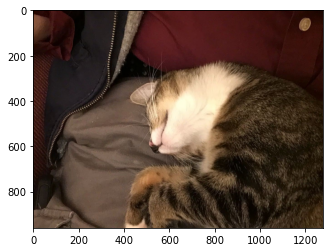

In [37]:
img = test.iloc[0]['image']
plt.imshow(img)

# Test de l'enregistrement du pickle 

In [39]:
with open('dataframe_chat.pkl', 'rb') as file : 
    df = pickle.load(file)
df.head(2)


,url,image
0,https://s3.c.im/media_attachments/files/111/25...,"[[[37, 6, 1], [37, 6, 1], [37, 6, 1], [36, 5, ..."
1,https://cdn.masto.host/mastodonart/media_attac...,"[[[253, 253, 253], [253, 253, 253], [253, 253,..."
